In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('sales_train.csv.gz')

In [4]:
items = pd.read_csv('items.csv')
test = data.merge(items, on='item_id', how='inner')
test.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [5]:
test['transaction'] = test['item_price'] * test['item_cnt_day']
test['datetime'] = pd.to_datetime(test['date'], format='%d.%m.%Y')
#test = test[(test['datetime'] >= '2014-09-01') & (test['datetime'] < '2014-10-01') ]
test_sep =  test.groupby(['datetime'],as_index=False)['transaction'].sum()


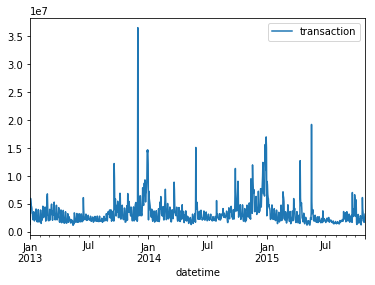

In [7]:
test_sep.plot(x='datetime',y='transaction')

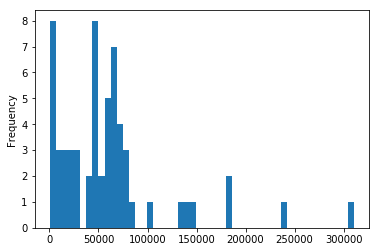

In [9]:
test_sep_storesf =  test.groupby(['shop_id'],as_index=False)['item_cnt_day'].sum()
test_sep_storesf.item_cnt_day.plot(kind='hist',bins=50)

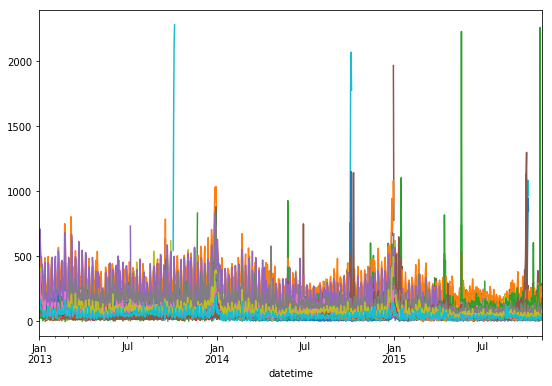

In [10]:
test_sep_stores = (test.groupby(['datetime','shop_id'])['item_cnt_day'].sum()).to_frame(name = None)
test_sep_stores.unstack(level=1).plot(figsize = (9,6),kind='line',subplots=False,legend=False)

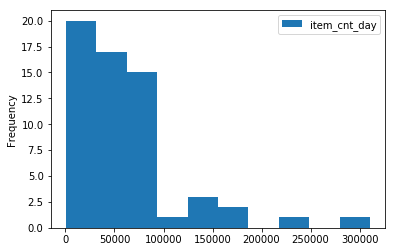

In [12]:
by_store = test.groupby(['shop_id'])['item_cnt_day'].sum().to_frame(name=None)
by_store.plot(kind='hist')

Quick plot of how different stores differed in sales over the course of the month. Distribution statistics should be calculated in more detail but a quick note would be that obviously shop id will have predictive power here, especailly with combination of time. Should look into the creation of weekday features plus features measuring performance day before and after

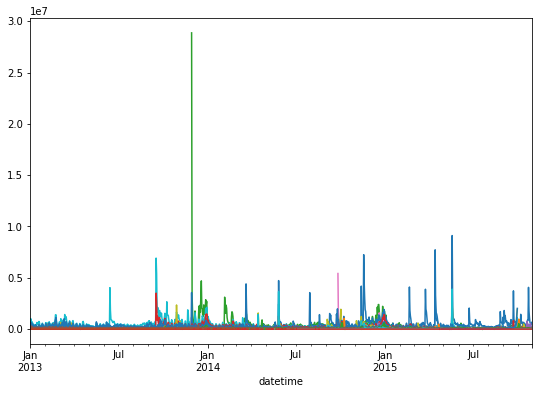

In [13]:
test_sep_cats = (test.groupby(['datetime','item_category_id'])['transaction'].sum()).to_frame(name = None)
test_sep_cats.unstack(level=1).plot(figsize = (9,6),kind='line',subplots=False,legend=False)

Category also has a large affect on sales as shown above

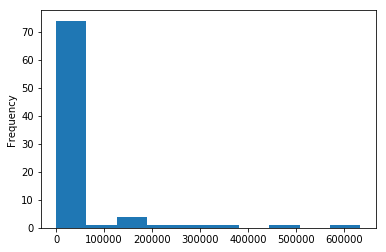

In [14]:
test_sep_catsf = (test.groupby(['item_category_id'])['item_cnt_day'].sum()).to_frame(name = None)
test_sep_catsf['item_cnt_day'].plot(kind='hist')

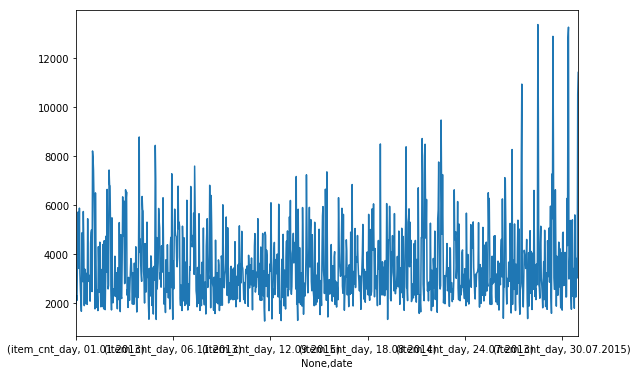

In [15]:
counts_day = (test.groupby(['date'])['item_cnt_day'].sum()).to_frame(name = None)
ax =counts_day.unstack(level=1).plot(figsize = (9,6),kind='line',subplots=False,legend=False)


Above is the item_cnt sales trend over time in total

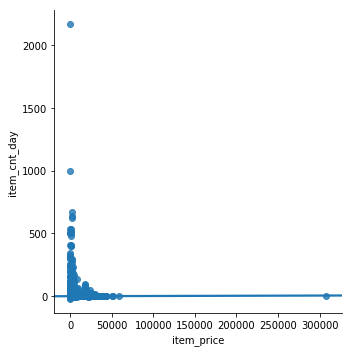

In [16]:
import seaborn as sns
sns.lmplot(x='item_price',y='item_cnt_day',data=test)

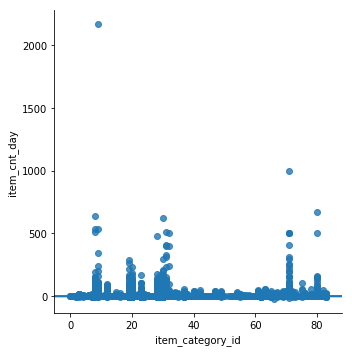

In [17]:
sns.lmplot(x='item_category_id',y='item_cnt_day',data=test)